### UPVOTE, if you like :)

* **1 Introduction**
* **2 Load and check data**
    * 2.1 load data
    * 2.2 check for null and missing values
    * 2.3 Outlier detection
* **3 Feature analysis**
    * 3.1 Numerical values
    * 3.2 Categorical values
* **4 Filling missing Values**
* **5 Modeling**

# Introduction

Hello all! In this kernel, we will be going through Exploratory Data Analysis of different features of the dataset, and Predict whether the particular person will be having a **Diabetes** or not!

Being a beginner in building an interactive Kernels, please if you get doubt in any code, raise a question in the comments box below...

# Load and Check Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
data = pd.read_csv('../input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pandas_profiling.ProfileReport(data)

We have got our data!!!

In [4]:
data.shape

(768, 9)

### Null/Missing values

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No NULL values exist! Thats a good news...

### Outlier Detection

In [6]:
# O1 = Q1-1.5(IQR) -> 0.082-(1.5*3.6)
# O2 = Q3+1.5(IQR) -> 3.67+(1.5*3.6) =9
data2=data.copy()
del data2['Outcome']
for i in range(8):
    col=data2.columns[i]
    q3, q1 = np.percentile(data2[col], [75,25])
    iqr = q3 - q1
    o1=q1-1.5*iqr
    o2=q3+1.5*iqr
    lis=[]
    for j in range(768):
        if data2['{}'.format(col)][j]<=o2 and data['{}'.format(col)][j]>=o1:
            lis.append(data2[col][j])
    print("Outliers {} ->".format(col),768-len(lis))

Outliers Pregnancies -> 4
Outliers Glucose -> 5
Outliers BloodPressure -> 45
Outliers SkinThickness -> 1
Outliers Insulin -> 34
Outliers BMI -> 19
Outliers DiabetesPedigreeFunction -> 29
Outliers Age -> 9


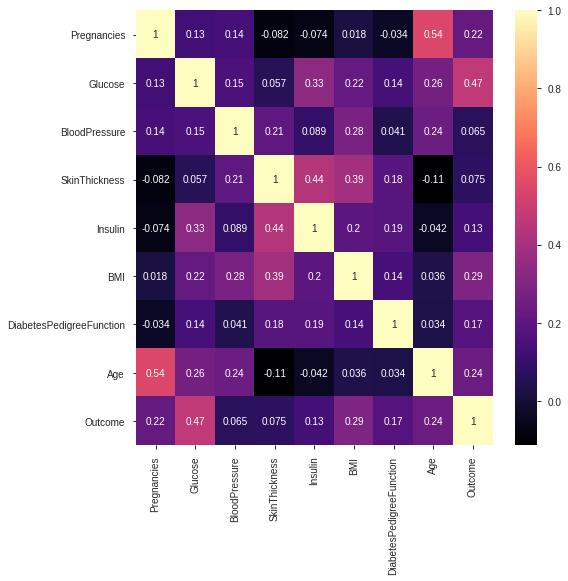

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='magma')

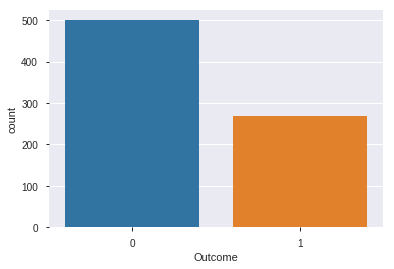

In [8]:
sns.countplot('Outcome',data=data)

# Feature Analysis

## Numerical Data

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Glucose

**Having 5 Outliers**

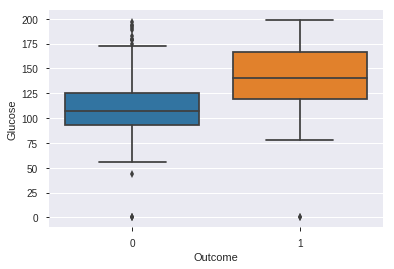

In [11]:
sns.boxplot('Outcome','Glucose',data=data)

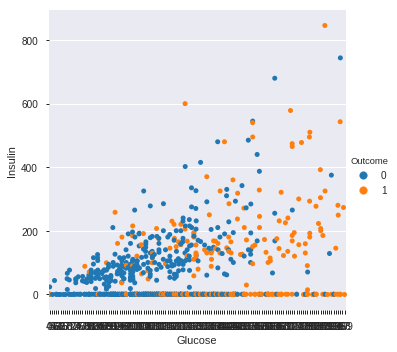

In [12]:
sns.catplot('Glucose','Insulin',data=data,hue='Outcome')

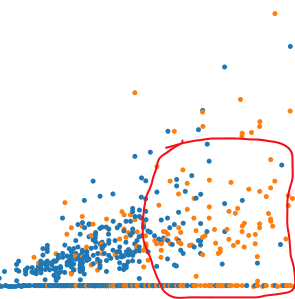

> Clearly, we can see that, a person with High level of Glucose, but having a approximate 0 insulin level, will be a Diabetic patient (most probably)

In [13]:
# O1 = Q1-1.5(IQR) -> 0.082-(1.5*3.6)
# O2 = Q3+1.5(IQR) -> 3.67+(1.5*3.6) =9
data3=data[['Glucose']]
for i in range(1):
    col=data3.columns[i]
    q3, q1 = np.percentile(data3[col], [75,25])
    iqr = q3 - q1
    o1=q1-1.5*iqr
    o2=q3+1.5*iqr
    lis=[]
    mean=np.mean(data[col])
    for j in range(506):
        if data3['{}'.format(col)][j]>o2 or data3['{}'.format(col)][j]<o1:
            data[col][j]=mean

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


You can check that, Now there is no **Outliers** left for 'Glucose' column!

### Blood Pressure

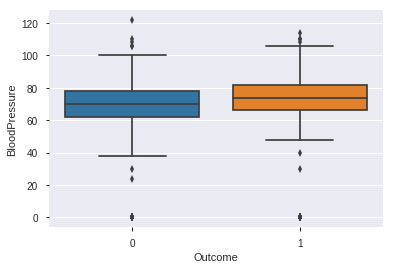

In [14]:
sns.boxplot('Outcome','BloodPressure',data=data)

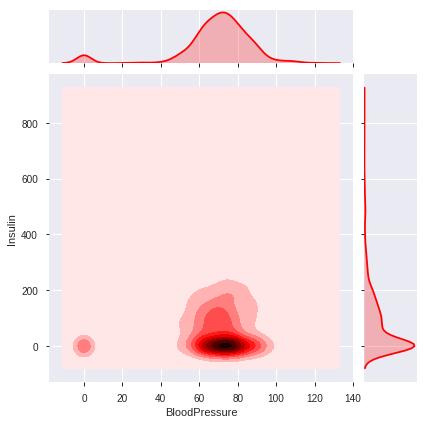

In [15]:
sns.jointplot('BloodPressure','Insulin',data=data,kind='kde',color='red')

From SME, we came to know that, If insulin is low, and patient is Diabetic --> BP will be **HIGH**
<br>No other relation exist between, Insulin and BP...

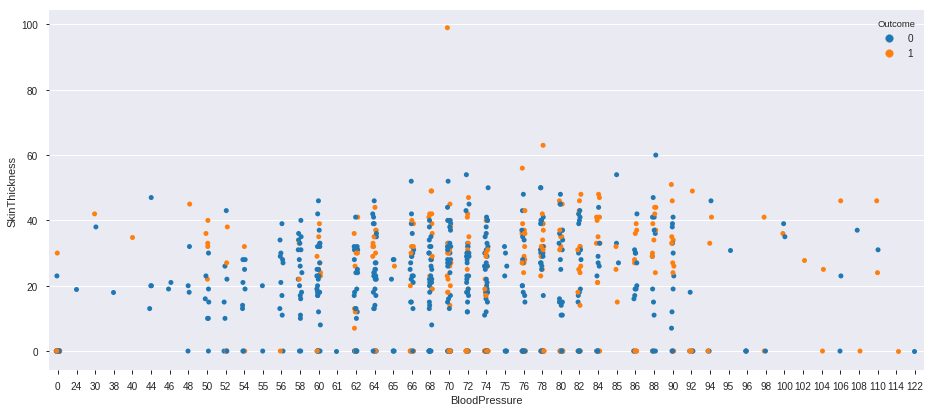

In [16]:
g=sns.catplot('BloodPressure','SkinThickness',data=data,kind='strip',hue='Outcome',legend_out=False)
g.fig.set_size_inches(15,6)

Higher BP, no matter what the skinthickness is, Most probably patient will be a diabetic one...

**More** skinthickness, will also be leading to **Diabetes**

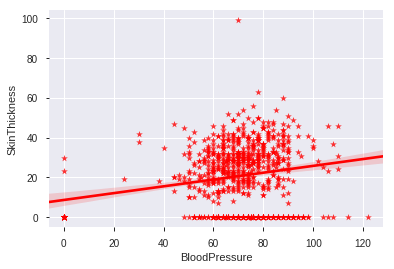

In [17]:
sns.regplot('BloodPressure','SkinThickness',data=data,marker='*',color='red')

Linear trend!!! But nothing surprising about it...

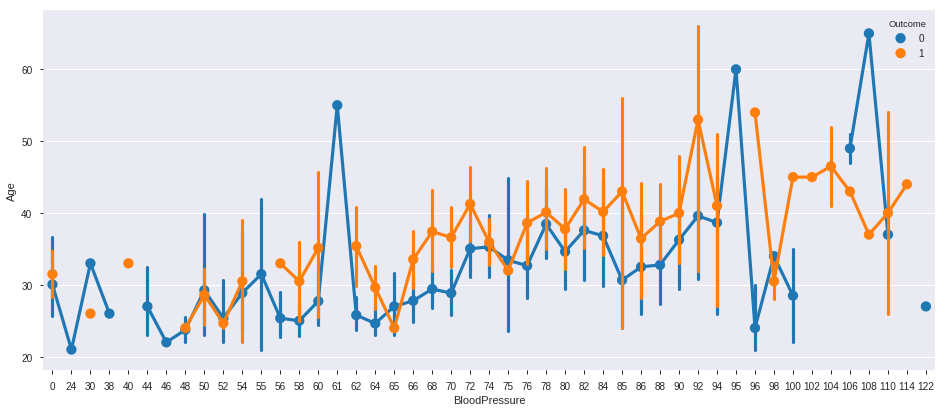

In [18]:
g=sns.catplot('BloodPressure','Age',data=data,hue='Outcome',kind='point',legend_out=False)
g.fig.set_size_inches(15,6)

*People having same BP, but of greater age, are More prone to Diabetes*

### SkinThickness

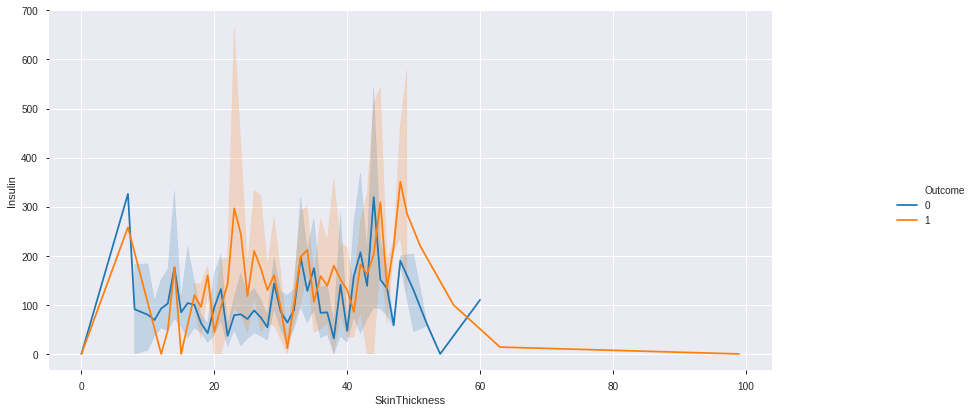

In [19]:
g=sns.relplot('SkinThickness','Insulin',data=data,kind='line',hue='Outcome')
g.fig.set_size_inches(15,6)

Transparent graph is showing the Variance in the Outcome, related to both of above mentioned variables...

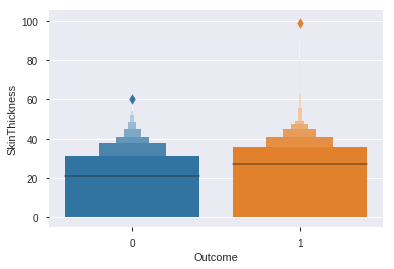

In [20]:
sns.boxenplot('Outcome','SkinThickness',data=data)

### Insulin

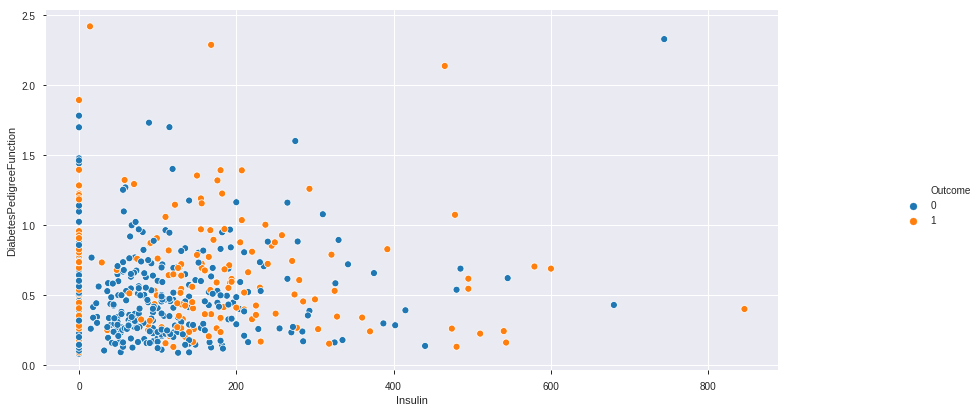

In [21]:
g=sns.relplot('Insulin','DiabetesPedigreeFunction',data=data,kind='scatter',hue='Outcome')
g.fig.set_size_inches(15,6)

Low DPF, Low Insulin(not zero) --> Outcome-0 (most probably)<br>
High DPF, Low Insulin --> Outcome-1 (most probably)<br>
Low DPF, High Insulin --> Outcome-1 (most probably)<br>
High DPF, High Insulin --> Outcome-0 (most probably)

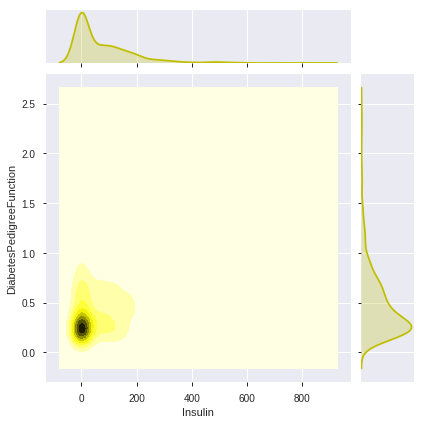

In [22]:
sns.jointplot('Insulin','DiabetesPedigreeFunction',kind='kde',color='y',data=data)

### BMI

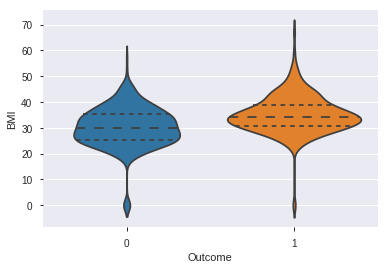

In [23]:
sns.violinplot('Outcome','BMI',data=data,bw='scott',scale='area',split=False,inner='quartile')

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Removing Zeros...

In [25]:
data['BloodPressure'] = np.where(data['BloodPressure']==0, data['BloodPressure'].mean(), data['BloodPressure'])
data['BMI'] = np.where(data['BMI']==0, data['BMI'].mean(), data['BMI'])
data['Insulin'] = np.where(data['Insulin']==0, data['Insulin'].mean(), data['Insulin'])
data['SkinThickness'] = np.where(data['SkinThickness']==0, data['SkinThickness'].mean(), data['SkinThickness'])

## Machine Learning

In [26]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
params = {
     'learning_rate': [0.05,0.06],
     'n_estimators': [1000,1100],
     'max_depth':[7,8],
     'reg_alpha':[0.3,0.4,0.5]
    }
 
# Initializing the XGBoost Regressor
xgb_model = XGBClassifier()
 
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,
                    verbose=True,
                    cv=10,
                    n_jobs=-1)
gsearch.fit(X,y) 
#Printing the best chosen params
print(gsearch.best_params_)'''

"from xgboost import XGBClassifier\nfrom sklearn.model_selection import cross_val_score,GridSearchCV\nparams = {\n     'learning_rate': [0.05,0.06],\n     'n_estimators': [1000,1100],\n     'max_depth':[7,8],\n     'reg_alpha':[0.3,0.4,0.5]\n    }\n \n# Initializing the XGBoost Regressor\nxgb_model = XGBClassifier()\n \n# Gridsearch initializaation\ngsearch = GridSearchCV(xgb_model, params,\n                    verbose=True,\n                    cv=10,\n                    n_jobs=-1)\ngsearch.fit(X,y) \n#Printing the best chosen params\nprint(gsearch.best_params_)"

In [29]:
import xgboost
from xgboost import XGBClassifier
rfc= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.06, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)
y_pred_prob=rfc.predict_proba(X_test)

In [30]:
y_pred_prob=y_pred_prob[:,1]

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[90 17]
 [12 35]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       107
           1       0.67      0.74      0.71        47

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154

0.8116883116883117


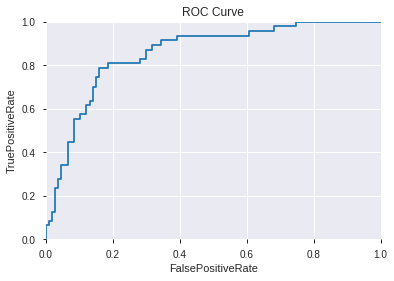

In [32]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)
